In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scprep
import pickle
import pathlib

In [2]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')
traj_A = np.load('../results_final_Dec22/trajectories_A_extreme.npy')
traj_T = np.load('../results_final_Dec22/trajectories_T_extreme.npy')
with open('../results_final_Dec22/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
X_phate = scaler.transform(adata.obsm['X_phate'])
traj_A_gene_all = np.load('../results_final_Dec22/traj_gene_space_A.npy')
traj_T_gene_all = np.load('../results_final_Dec22/traj_gene_space_T.npy')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.1.post1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
save_path = '../results_final_Jan30'
pathlib.Path(save_path).mkdir(parents=True, exist_ok=True)

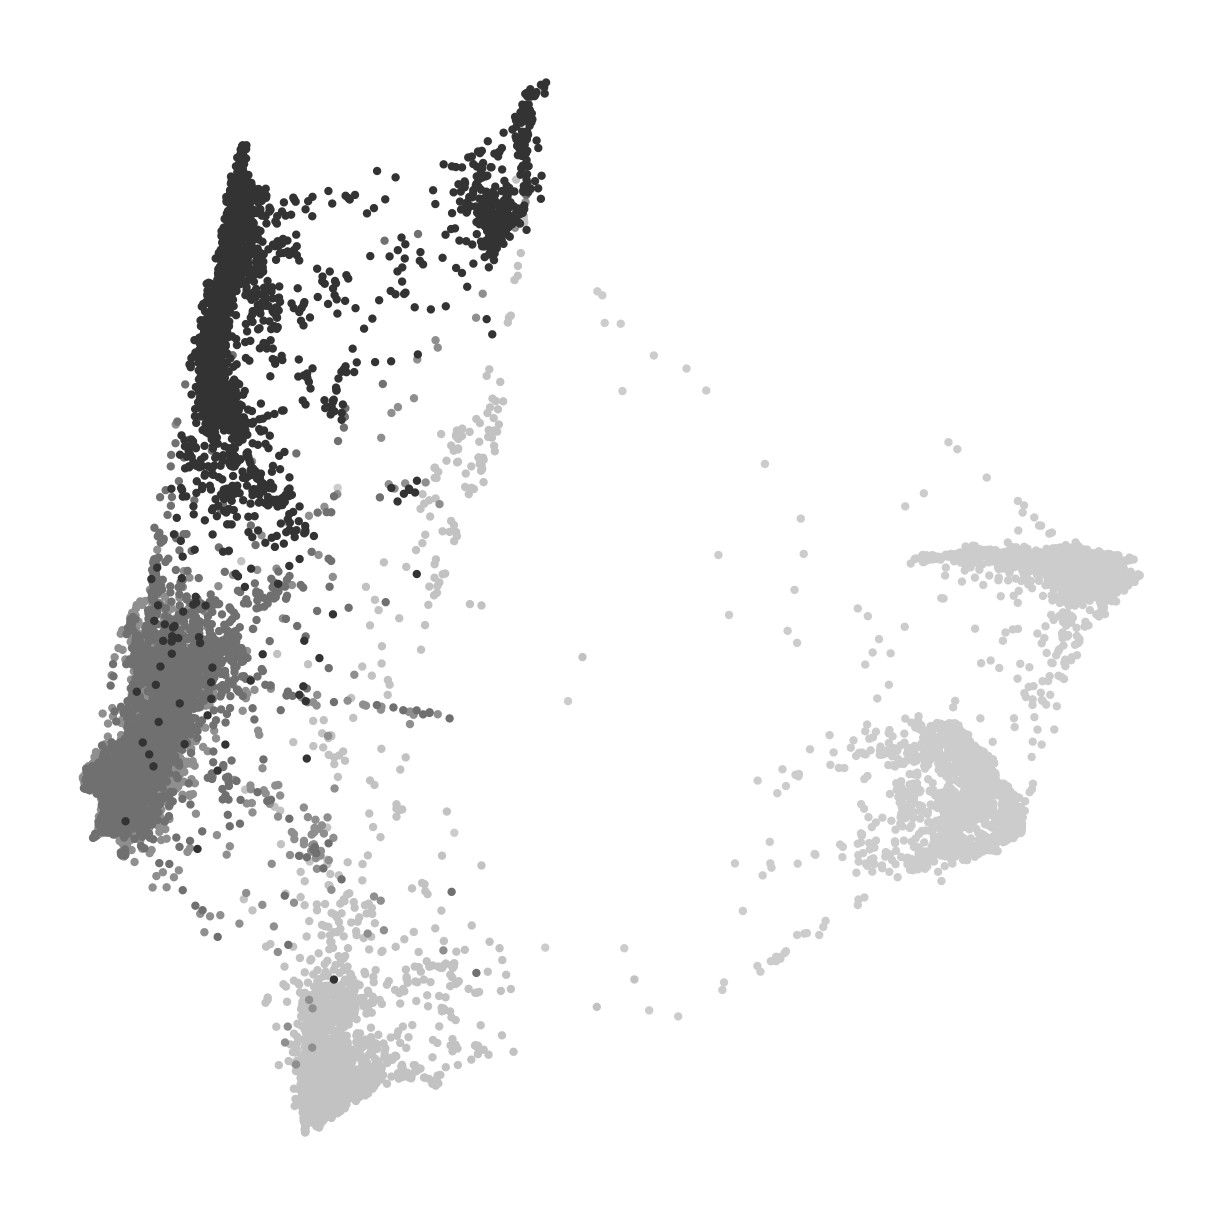

In [4]:
plt.figure(figsize=(5, 5), dpi=300)
sct = plt.scatter(X_phate[:, 0], X_phate[:, 1],
                 c=adata.obs['day'], s=1, alpha=1, cmap=plt.cm.Greys_r.from_list('custom_greys', ['#CCCCCC', '#333333']))

plt.xticks([])
plt.yticks([])

# remove plot box
plt.axis('off')
plt.savefig(f'{save_path}/PHATE.pdf', bbox_inches='tight', transparent=True)
plt.show()


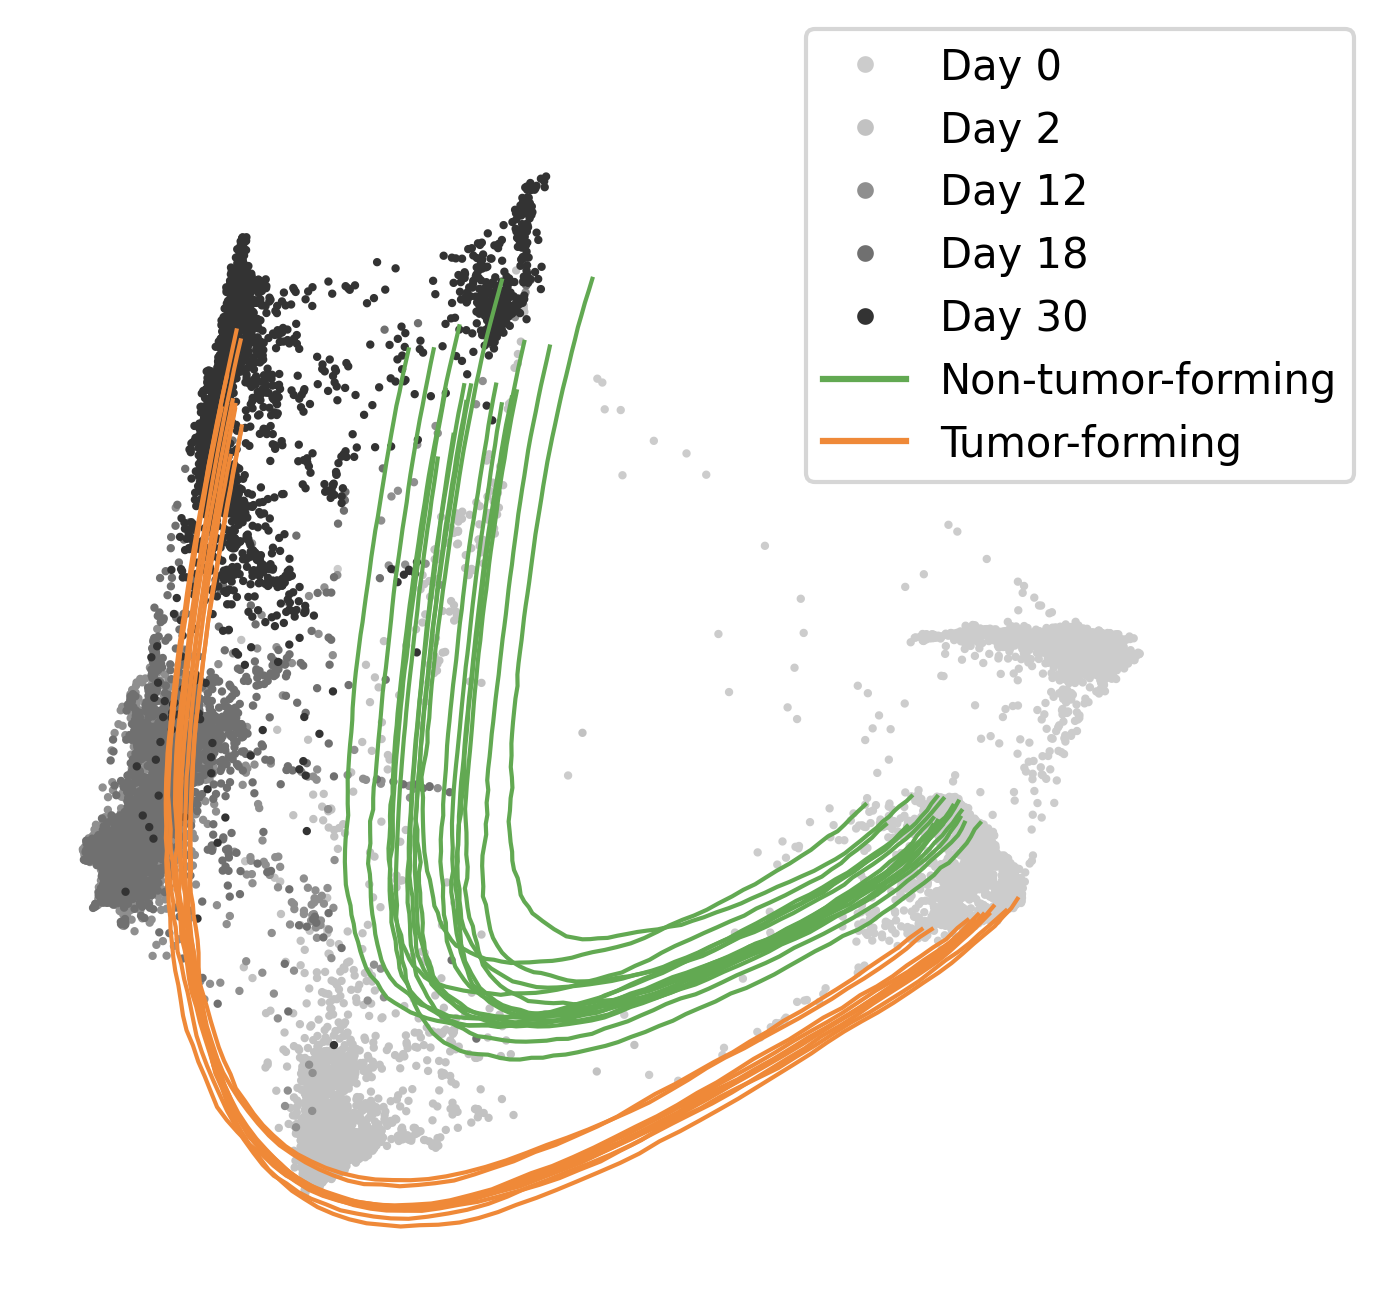

In [5]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create the scatter plot
plt.figure(figsize=(5, 5), dpi=300)
sct = plt.scatter(X_phate[:, 0], X_phate[:, 1],
                 c=adata.obs['day'], s=1, alpha=1, cmap=plt.cm.Greys_r.from_list('custom_greys', ['#CCCCCC', '#333333']))

# Create the legend manually for days
unique_days = sorted(adata.obs['day'].unique())  # Get unique days
colors = sct.cmap(sct.norm(unique_days))  # Map unique days to colors

# Create legend elements for days and trajectories
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5, label=f"Day {int(day)}")
    for day, color in zip(unique_days, colors)
]
# Add trajectory legend elements
legend_elements.extend([
    Line2D([0], [0], color='#62a952', label='Non-tumor-forming'),
    Line2D([0], [0], color='#ef8938', label='Tumor-forming')
])

# Add the legend to the plot
plt.legend(handles=legend_elements, bbox_to_anchor=(0.65, 1.1), loc='upper left')

np.random.seed(0)
# subsampled_idx = np.random.choice(traj_A.shape[1], 10, replace=False)
# subsampled_idx = np.arange(traj_A.shape[1])
subsampled_idx = np.where(traj_A[-1,:,0] < np.sort(traj_A[-1,:,0])[-2])[0]
filtered_idx = subsampled_idx
for j in subsampled_idx:
    # Use the width array to determine the linewidths for this trajectory
    traj = traj_A[:,j,:]
    plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='#62a952');

np.random.seed(0)
subsampled_idx = np.random.choice(traj_T.shape[1], 10, replace=False)
# subsampled_idx = np.arange(traj_T.shape[1])

for j in subsampled_idx:
    # Use the width array to determine the linewidths for this trajectory
    traj = traj_T[:,j,:]
    plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='#ef8938');


# remove ticks
plt.xticks([])
plt.yticks([])

# remove plot box
plt.axis('off')

plt.savefig(f'{save_path}/A_T_Traj_PHATE_legend2.pdf', bbox_inches='tight', transparent=True)
plt.show()



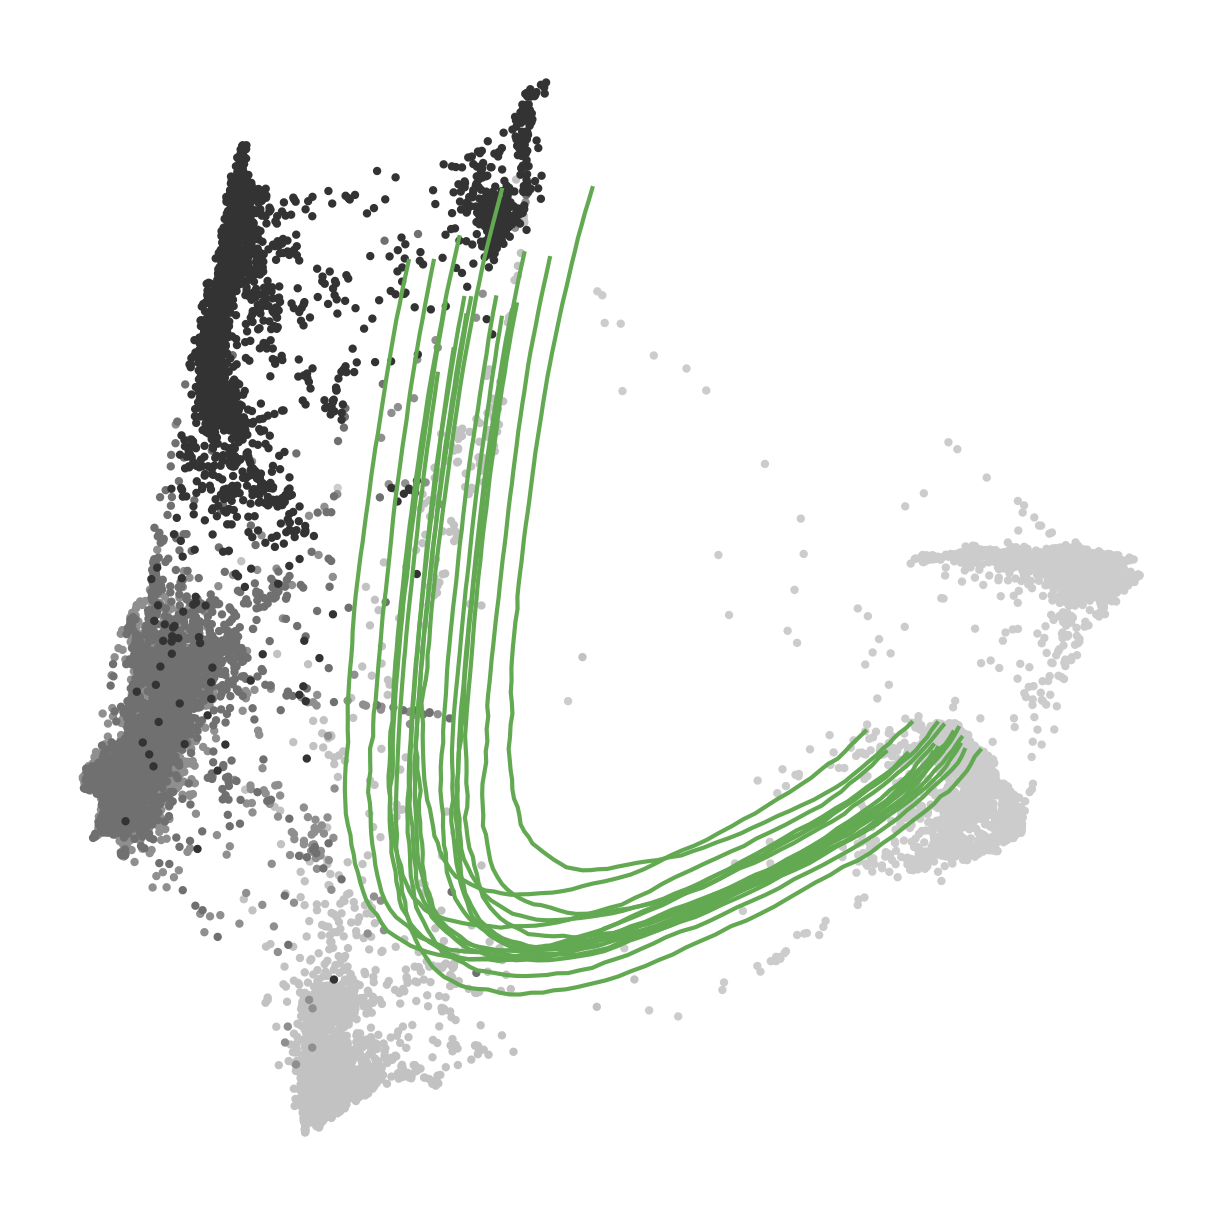

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create the scatter plot
plt.figure(figsize=(5, 5), dpi=300)
sct = plt.scatter(X_phate[:, 0], X_phate[:, 1],
                 c=adata.obs['day'], s=1, alpha=1, cmap=plt.cm.Greys_r.from_list('custom_greys', ['#CCCCCC', '#333333']))

# Create the legend manually for days
unique_days = sorted(adata.obs['day'].unique())  # Get unique days
colors = sct.cmap(sct.norm(unique_days))  # Map unique days to colors

# # Create legend elements for days and trajectories
# legend_elements = [
#     Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5, label=f"Day {int(day)}")
#     for day, color in zip(unique_days, colors)
# ]
# # Add trajectory legend elements
# legend_elements.extend([
#     Line2D([0], [0], color='#62a952', label='Non-tumor-forming'),
#     # Line2D([0], [0], color='#ef8938', label='Tumor-forming')
# ])

# # Add the legend to the plot
# plt.legend(handles=legend_elements, bbox_to_anchor=(0.65, 1.1), loc='upper left')

np.random.seed(0)
# subsampled_idx = np.random.choice(traj_A.shape[1], 10, replace=False)
# subsampled_idx = np.arange(traj_A.shape[1])
subsampled_idx = np.where(traj_A[-1,:,0] < np.sort(traj_A[-1,:,0])[-2])[0]
filtered_idx = subsampled_idx
for j in subsampled_idx:
    # Use the width array to determine the linewidths for this trajectory
    traj = traj_A[:,j,:]
    plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='#62a952');

# np.random.seed(0)
# subsampled_idx = np.random.choice(traj_T.shape[1], 10, replace=False)
# subsampled_idx = np.arange(traj_T.shape[1])

# for j in subsampled_idx:
#     # Use the width array to determine the linewidths for this trajectory
#     traj = traj_T[:,j,:]
#     plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='#ef8938');


# remove ticks
plt.xticks([])
plt.yticks([])

# remove plot box
plt.axis('off')

plt.savefig(f'{save_path}/A_Traj_PHATE_legend2.pdf', bbox_inches='tight', transparent=True)
plt.show()



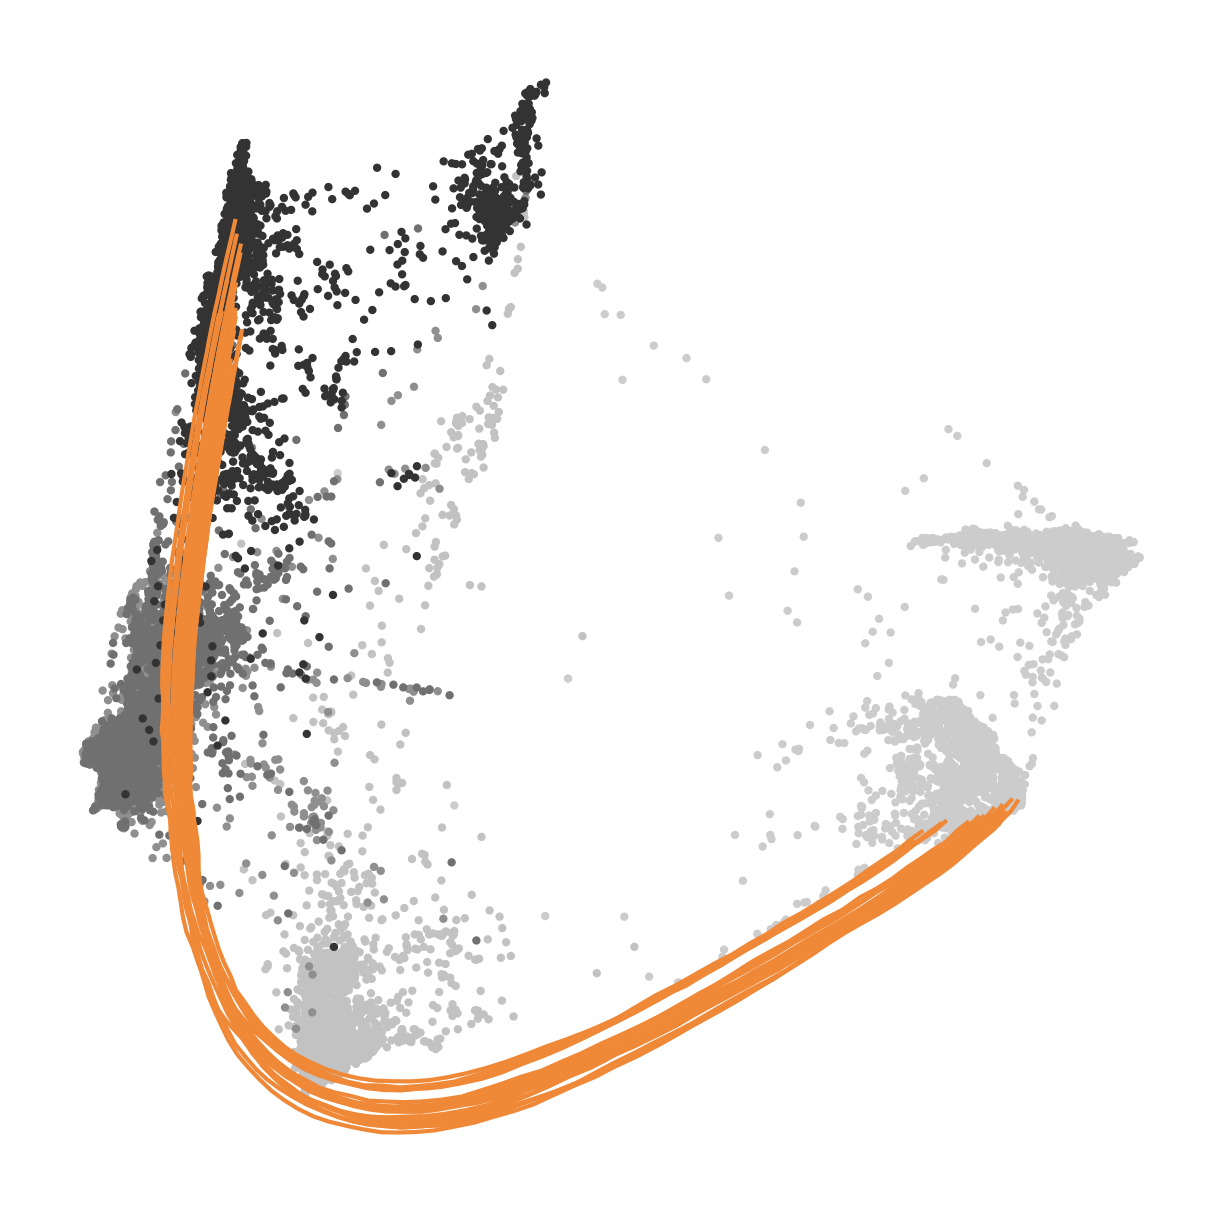

In [7]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create the scatter plot
plt.figure(figsize=(5, 5), dpi=300)
sct = plt.scatter(X_phate[:, 0], X_phate[:, 1],
                 c=adata.obs['day'], s=1, alpha=1, cmap=plt.cm.Greys_r.from_list('custom_greys', ['#CCCCCC', '#333333']))

# Create the legend manually for days
unique_days = sorted(adata.obs['day'].unique())  # Get unique days
colors = sct.cmap(sct.norm(unique_days))  # Map unique days to colors

# # Create legend elements for days and trajectories
# legend_elements = [
#     Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5, label=f"Day {int(day)}")
#     for day, color in zip(unique_days, colors)
# ]
# # Add trajectory legend elements
# legend_elements.extend([
#     Line2D([0], [0], color='#62a952', label='Non-tumor-forming'),
#     # Line2D([0], [0], color='#ef8938', label='Tumor-forming')
# ])

# # Add the legend to the plot
# plt.legend(handles=legend_elements, bbox_to_anchor=(0.65, 1.1), loc='upper left')

# np.random.seed(0)
# # subsampled_idx = np.random.choice(traj_A.shape[1], 10, replace=False)
# # subsampled_idx = np.arange(traj_A.shape[1])
# subsampled_idx = np.where(traj_A[-1,:,0] < np.sort(traj_A[-1,:,0])[-2])[0]
# filtered_idx = subsampled_idx
# for j in subsampled_idx:
#     # Use the width array to determine the linewidths for this trajectory
#     traj = traj_A[:,j,:]
#     plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='#62a952');

np.random.seed(0)
subsampled_idx = np.random.choice(traj_T.shape[1], 10, replace=False)
subsampled_idx = np.arange(traj_T.shape[1])

for j in subsampled_idx:
    # Use the width array to determine the linewidths for this trajectory
    traj = traj_T[:,j,:]
    plt.plot(traj[:, 0], traj[:, 1], alpha=1, linewidth=1, color='#ef8938');


# remove ticks
plt.xticks([])
plt.yticks([])

# remove plot box
plt.axis('off')

plt.savefig(f'{save_path}/T_Traj_PHATE_legend2.pdf', bbox_inches='tight', transparent=True)
plt.show()



In [8]:
# CASP4,  ROCK1, SMAD7, RHOT2, BID, AIFM3
A_genes = ['CASP4', 'ROCK1', 'SMAD7', 'RHOT2', 'BID', 'AIFM3']
# SNAI2, IL32, SAT1, PMEPA, CTHRC1, TGFB2
T_genes = ['SNAI2', 'IL32', 'SAT1', 'PMEPA1', 'CTHRC1', 'TGFB2']

CASP4 True
ROCK1 True
SMAD7 True
RHOT2 True
BID True
AIFM3 True


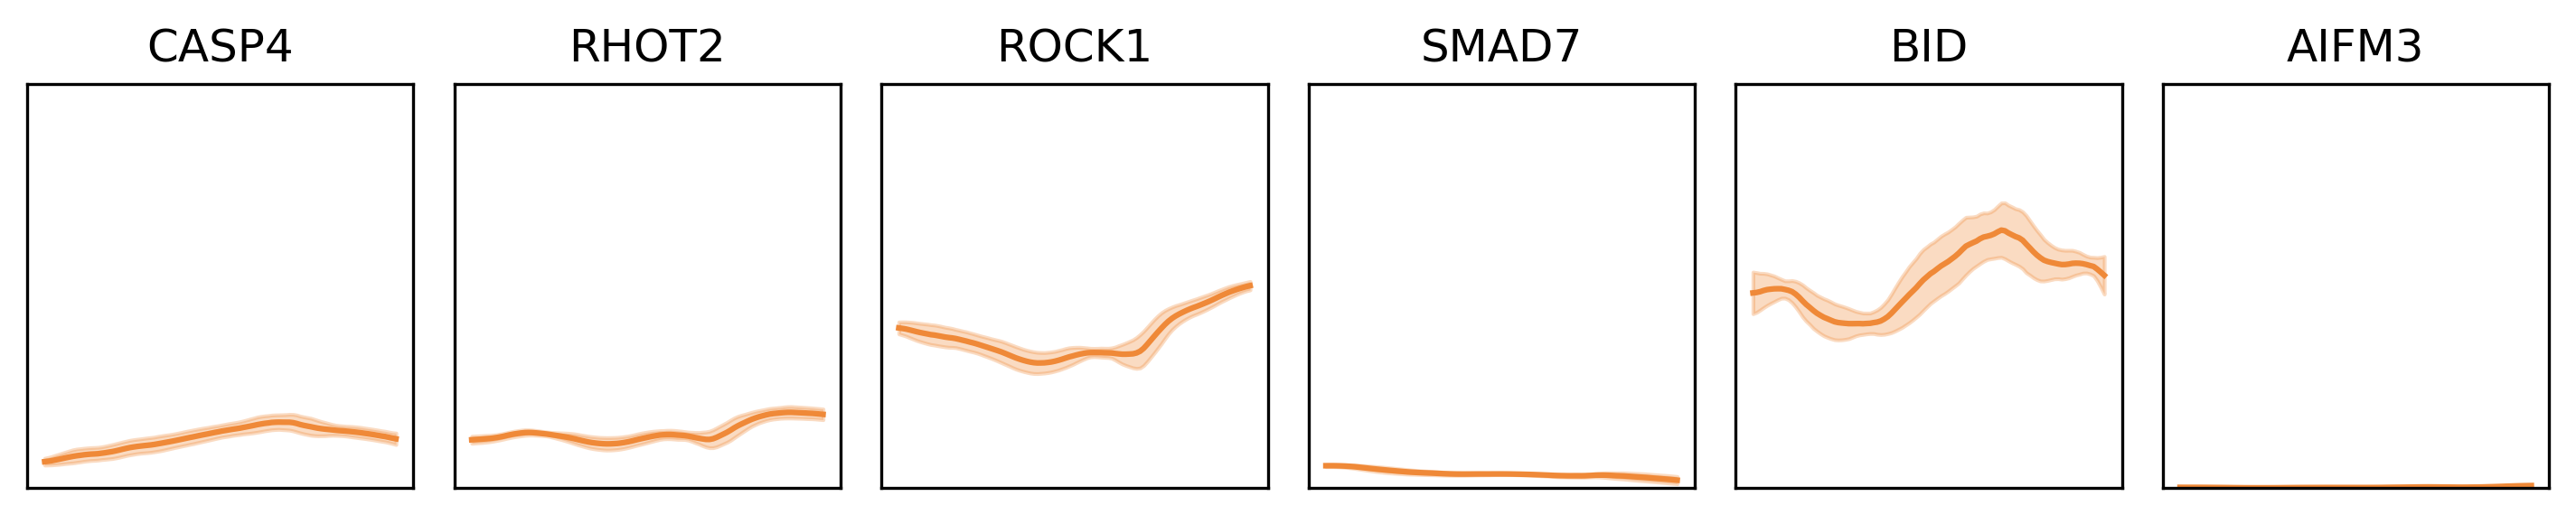

In [24]:
# [Zeb1, CDH1, Epcam, Esrra and Cav1, p53 and Bax]
genes_to_plot = A_genes
# assert all([g in adata.var_names for g in genes_to_plot])
for g in genes_to_plot:
    print(g, g in adata.var_names)

gene_mask = np.isin(adata.var_names, genes_to_plot)
traj_A_gene = traj_A_gene_all[:, :, gene_mask]
traj_T_gene = traj_T_gene_all[:, :, gene_mask]
gene_names = adata.var_names[gene_mask]

traj_A_mean = np.mean(traj_A_gene, axis=1)
traj_A_std = np.std(traj_A_gene, axis=1)
traj_T_mean = np.mean(traj_T_gene, axis=1)
traj_T_std = np.std(traj_T_gene, axis=1)

fig, axes = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

# Find global min and max values across all genes
y_min = min(np.min(traj_A_mean - traj_A_std), np.min(traj_T_mean - traj_T_std))
y_max = max(np.max(traj_A_mean + traj_A_std), np.max(traj_T_mean + traj_T_std))

for i, gene in enumerate(gene_names):
    ax = axes[i]
    ax.plot(traj_A_mean[:, i], color='#ef8938', label='Apoptotic')
    ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='#ef8938')
    # ax.plot(traj_T_mean[:, i], color='#ef8938', label='Tumor-forming')
    # ax.fill_between(range(traj_T_mean.shape[0]), traj_T_mean[:, i] - traj_T_std[:, i], traj_T_mean[:, i] + traj_T_std[:, i], alpha=0.3, color='#ef8938')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_ylim(y_min, y_max)  # Set same y-axis limits for all subplots

fig.tight_layout()
plt.savefig(f'{save_path}/just_A_genes.pdf', bbox_inches='tight', transparent=True)
plt.show()


SNAI2 True
IL32 True
SAT1 True
PMEPA1 True
CTHRC1 True
TGFB2 True


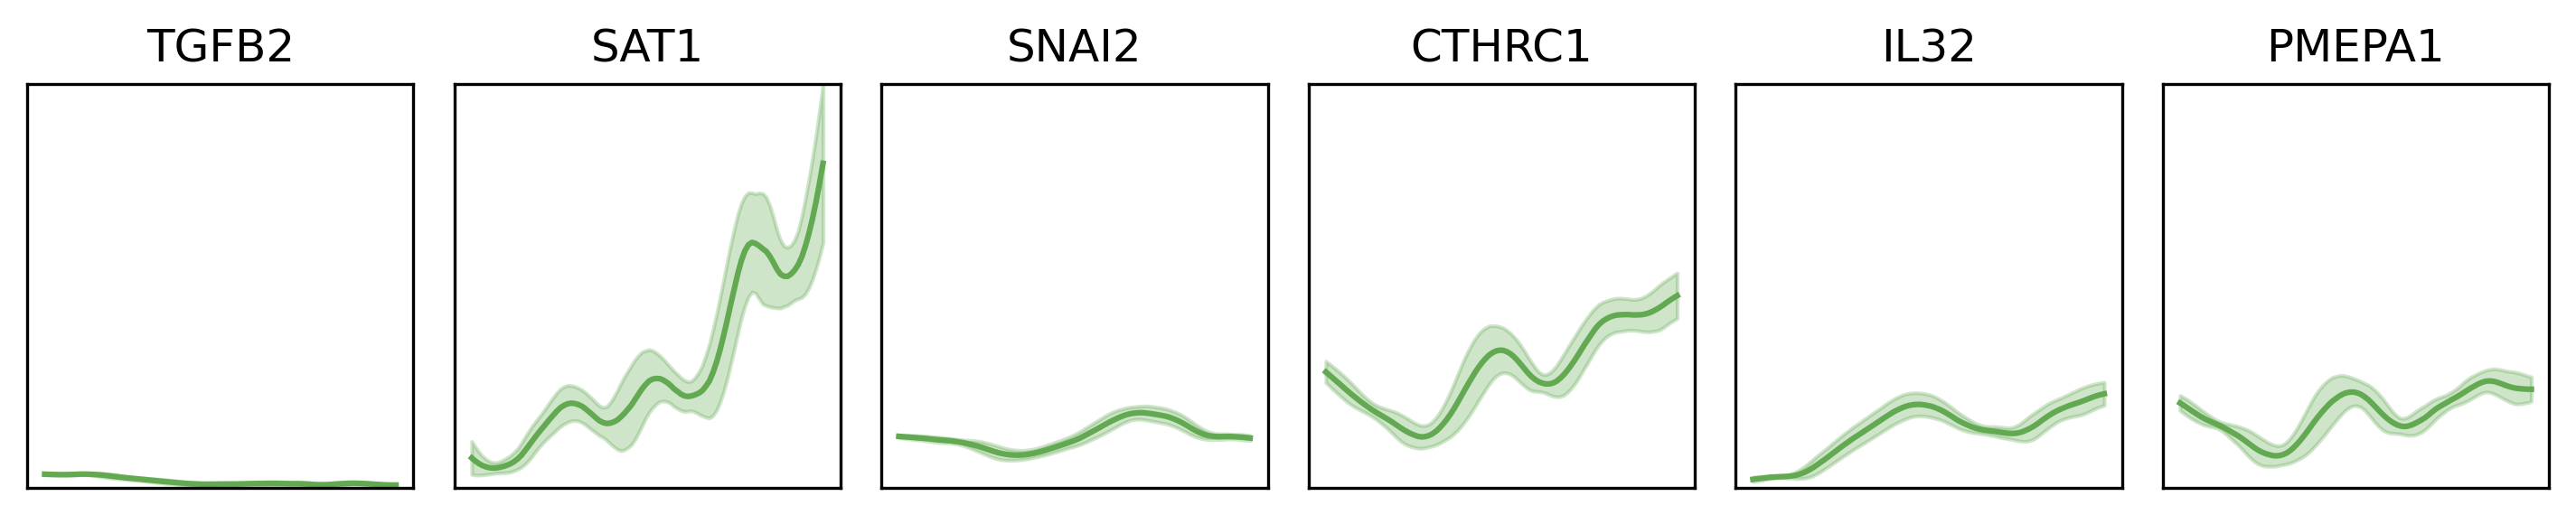

In [25]:
# [Zeb1, CDH1, Epcam, Esrra and Cav1, p53 and Bax]
genes_to_plot = T_genes
# assert all([g in adata.var_names for g in genes_to_plot])
for g in genes_to_plot:
    print(g, g in adata.var_names)

gene_mask = np.isin(adata.var_names, genes_to_plot)
traj_A_gene = traj_A_gene_all[:, :, gene_mask]
traj_T_gene = traj_T_gene_all[:, :, gene_mask]
gene_names = adata.var_names[gene_mask]

traj_A_mean = np.mean(traj_A_gene, axis=1)
traj_A_std = np.std(traj_A_gene, axis=1)
traj_T_mean = np.mean(traj_T_gene, axis=1)
traj_T_std = np.std(traj_T_gene, axis=1)

fig, axes = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

# Find global min and max values across all genes
y_min = min(np.min(traj_A_mean - traj_A_std), np.min(traj_T_mean - traj_T_std))
y_max = max(np.max(traj_A_mean + traj_A_std), np.max(traj_T_mean + traj_T_std))

for i, gene in enumerate(gene_names):
    ax = axes[i]
    # ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    # ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    ax.plot(traj_T_mean[:, i], color='#62a952', label='Tumor-forming')
    ax.fill_between(range(traj_T_mean.shape[0]), traj_T_mean[:, i] - traj_T_std[:, i], traj_T_mean[:, i] + traj_T_std[:, i], alpha=0.3, color='#62a952')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_ylim(y_min, y_max)  # Set same y-axis limits for all subplots

fig.tight_layout()
plt.savefig(f'{save_path}/just_T_genes.pdf', bbox_inches='tight', transparent=True)
plt.show()


ESRRA True
ZEB1 True
CDH1 True


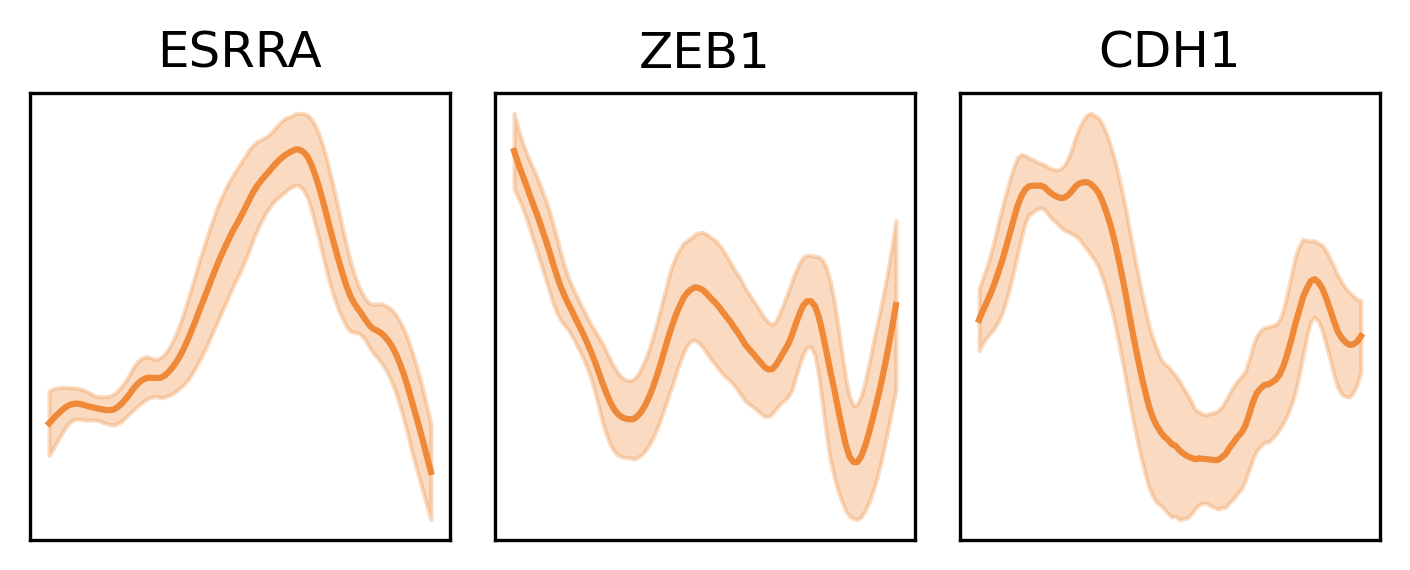

In [20]:
# [Zeb1, CDH1, Epcam, Esrra and Cav1, p53 and Bax]
genes_to_plot = ['ESRRA', 'ZEB1', 'CDH1']
# assert all([g in adata.var_names for g in genes_to_plot])
for g in genes_to_plot:
    print(g, g in adata.var_names)

gene_mask = np.isin(adata.var_names, genes_to_plot)
traj_A_gene = traj_A_gene_all[:, :, gene_mask]
traj_T_gene = traj_T_gene_all[:, :, gene_mask]
gene_names = adata.var_names[gene_mask]

traj_A_mean = np.mean(traj_A_gene, axis=1)
traj_A_std = np.std(traj_A_gene, axis=1)
traj_T_mean = np.mean(traj_T_gene, axis=1)
traj_T_std = np.std(traj_T_gene, axis=1)

fig, axes = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

for i, gene in enumerate(gene_names):
    ax = axes[i]
    # ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    # ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    ax.plot(traj_T_mean[:, i], color='#ef8938', label='Tumor-forming')
    ax.fill_between(range(traj_T_mean.shape[0]), traj_T_mean[:, i] - traj_T_std[:, i], traj_T_mean[:, i] + traj_T_std[:, i], alpha=0.3, color='#ef8938')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

fig.tight_layout()
plt.savefig(f'{save_path}/validation_tumor.pdf', bbox_inches='tight', transparent=True)
plt.show()


ESRRA True
ZEB1 True
CDH1 True


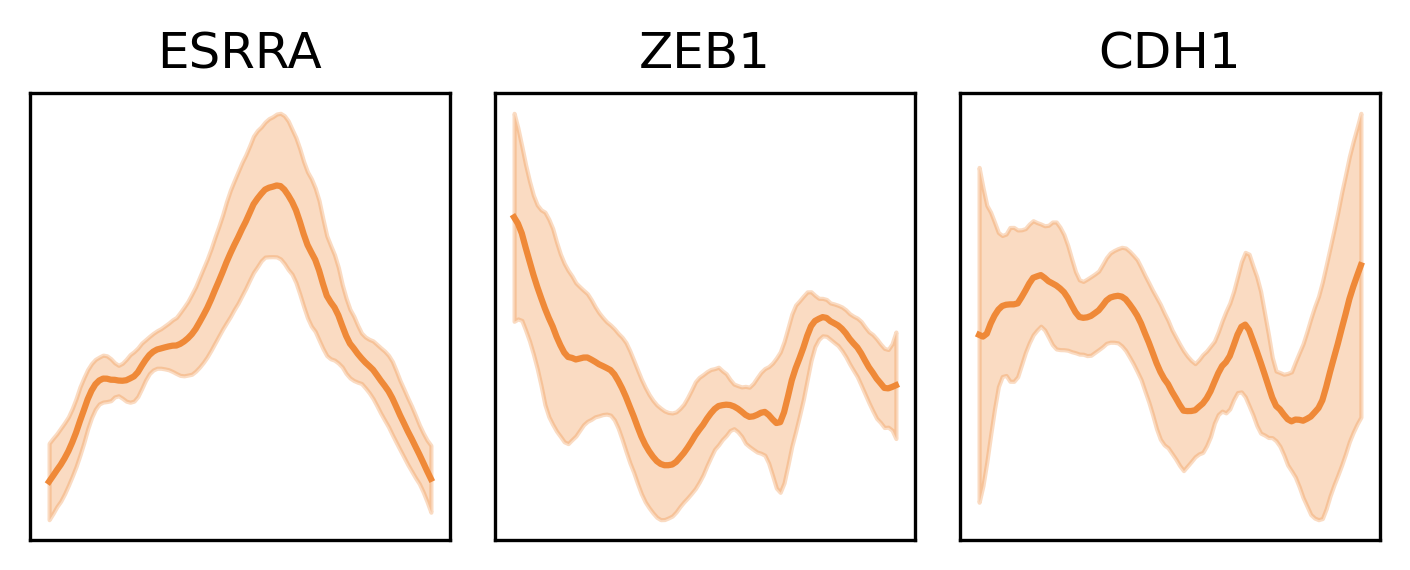

In [19]:
# [Zeb1, CDH1, Epcam, Esrra and Cav1, p53 and Bax]
genes_to_plot = ['ESRRA', 'ZEB1', 'CDH1']
# assert all([g in adata.var_names for g in genes_to_plot])
for g in genes_to_plot:
    print(g, g in adata.var_names)

gene_mask = np.isin(adata.var_names, genes_to_plot)
traj_A_gene = traj_A_gene_all[:, :, gene_mask]
traj_T_gene = traj_T_gene_all[:, :, gene_mask]
gene_names = adata.var_names[gene_mask]

traj_A_mean = np.mean(traj_A_gene, axis=1)
traj_A_std = np.std(traj_A_gene, axis=1)
traj_T_mean = np.mean(traj_T_gene, axis=1)
traj_T_std = np.std(traj_T_gene, axis=1)

fig, axes = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

for i, gene in enumerate(gene_names):
    ax = axes[i]
    # ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    # ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    # ax.plot(traj_T_mean[:, i], color='green', label='Tumor-forming')
    ax.plot(traj_A_mean[:, i], color='#ef8938', label='Apoptotic')
    ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='#ef8938')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

fig.tight_layout()
plt.savefig(f'{save_path}/validation_apoptotic.pdf', bbox_inches='tight', transparent=True)
plt.show()


ESRRA True
ZEB1 True
CDH1 True


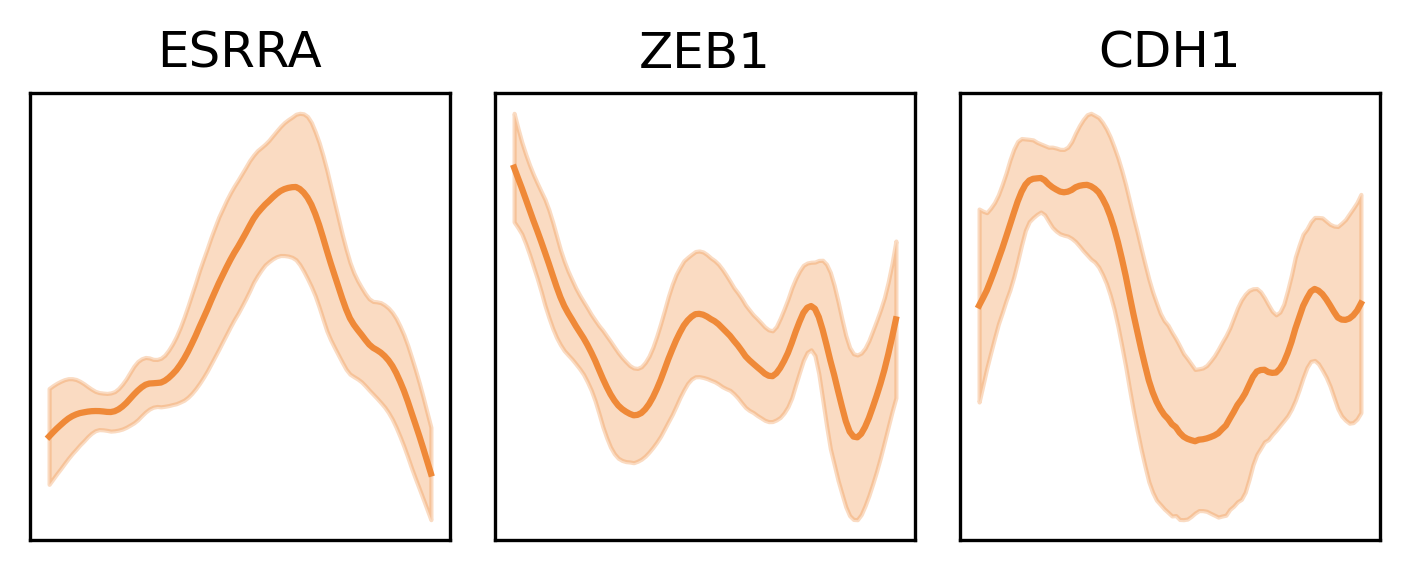

In [18]:
# [Zeb1, CDH1, Epcam, Esrra and Cav1, p53 and Bax]
genes_to_plot = ['ESRRA', 'ZEB1', 'CDH1']
# assert all([g in adata.var_names for g in genes_to_plot])
for g in genes_to_plot:
    print(g, g in adata.var_names)

gene_mask = np.isin(adata.var_names, genes_to_plot)
traj_A_gene = traj_A_gene_all[:, :, gene_mask]
traj_T_gene = traj_T_gene_all[:, :, gene_mask]
traj_genes = np.concatenate([traj_A_gene, traj_T_gene], axis=1)
gene_names = adata.var_names[gene_mask]

traj_mean = np.mean(traj_genes, axis=1)
traj_std = np.std(traj_genes, axis=1)

fig, axes = plt.subplots(1, len(gene_names), figsize=(1.6 * len(gene_names), 2), dpi=300)

for i, gene in enumerate(gene_names):
    ax = axes[i]
    # ax.plot(traj_A_mean[:, i], color='orange', label='Apoptotic')
    # ax.fill_between(range(traj_A_mean.shape[0]), traj_A_mean[:, i] - traj_A_std[:, i], traj_A_mean[:, i] + traj_A_std[:, i], alpha=0.3, color='orange')
    # ax.plot(traj_T_mean[:, i], color='green', label='Tumor-forming')
    ax.plot(traj_mean[:, i], color='#ef8938', label='All')
    ax.fill_between(range(traj_mean.shape[0]), traj_mean[:, i] - traj_std[:, i], traj_mean[:, i] + traj_std[:, i], alpha=0.3, color='#ef8938')
    ax.set_title(gene)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

fig.tight_layout()
plt.savefig(f'{save_path}/validation_all.pdf', bbox_inches='tight', transparent=True)
plt.show()
